In [50]:
import pandas as pd
import json
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

#Credentials
#EDIT WITH YOUR KEYS FROM YOU CONFIG FILE
from keys import client_id
from keys import client_id_secret
client_id=client_id
client_secret=client_id_secret

client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [53]:
# ***** THIS CODE BLOCK READS ALL 1400+ SPOTIFY PLAYLISTS, IT HAS NO SET LIMIT *****

# This code returns a dictionary, the keys are playlist titles
# The values are dictionaries containing the audio feature data for each song in the playlist

# Make an empty dictionary for later population with data
total_playlist_dict = {}

# Start making API calls, generate a list of playlist ID's and names 
playlists = sp.user_playlists("spotify")

playlist_ids=[]
playlist_names=[]

while playlists:
    for i, playlist in enumerate(playlists['items']):
        # print("%4d %s %s" % (i + 1 + playlists['offset'], playlist['uri'],  playlist['name']))
        playlist_ids.append(playlist['id'])
        playlist_names.append(playlist['name'])
        playlist
        
    if playlists['next']:
        playlists = sp.next(playlists)
        
    else:
        playlists = None
        
# Cycle through the playlists in playlist_ids
# Extract the songs in each playlist
for (ID, name) in zip(playlist_ids, playlist_names):
    playlist1 = sp.user_playlist_tracks(user="spotify", playlist_id=ID, fields=None, limit=100, offset=0, market=None)

    # Create lists to store song ID's and song names 
    song_ids = []
    song_names = []
    for i in range(len(playlist1["items"])):
        
        # Try/Except to avoid TypeError
        try:
            song_id = playlist1["items"][i]["track"]["id"]
            
        except TypeError:
            print("TypeError, skipping")
            continue
            
        song_name = playlist1["items"][i]["track"]["name"]
        song_ids.append(song_id)
        song_names.append(song_name)
        
    # Create empty lists to store Spotify's audio features and song name
    danceability = []
    energy = []
    speechiness = []
    acousticness = []
    tempo = []
    instrumentalness = []
    liveness = []
    loudness = []
    duration_ms = []
    key = []
    mode = []
    valence = []

    # Loop though list of song ID's
    for track in song_ids:
        track_features = sp.audio_features(tracks = track)
    
        # Append audio features to respective lists
        # Try/Except to avoid TypeError
        try:
            danceability.append(track_features[0]["danceability"])
            energy.append(track_features[0]["energy"])
            speechiness.append(track_features[0]["speechiness"])
            acousticness.append(track_features[0]["acousticness"])
            tempo.append(track_features[0]["tempo"])
            instrumentalness.append(track_features[0]["instrumentalness"])
            liveness.append(track_features[0]["liveness"])
            loudness.append(track_features[0]["loudness"])
            duration_ms.append(track_features[0]["duration_ms"])
            key.append(track_features[0]["key"])
            mode.append(track_features[0]["mode"])
            valence.append(track_features[0]["valence"])
            
        except TypeError:
            print("TypeError, skipping")
            continue
        
    # Place the listed data into a dictionary
    playlist_dict = {
        "Name":song_names,
        "Danceability":danceability,
        "Energy":energy,
        "Speechiness":speechiness,
        "Acousticness":acousticness,
        "Tempo":tempo,
        "Instrumentalness":instrumentalness,
        "Liveness":liveness,
        "Loudness":loudness,
        "Duration(ms)":duration_ms,
        "Key":key,
        "Mode":mode,
        "Valence":valence
    }
    
    # Compile the data dictionaries into final dictionary with playlist titles as keys
    total_playlist_dict.update({name:playlist_dict})

TypeError, skipping
TypeError, skipping
TypeError, skipping
TypeError, skipping
TypeError, skipping
TypeError, skipping
TypeError, skipping
TypeError, skipping


JSONDecodeError: Expecting value: line 2 column 1 (char 1)

In [280]:
len(total_playlist_dict)

244

In [282]:
import numpy as np

# Save
np.save('total_playlist_dict.npy', "dictionary") 

# Load
#read_dictionary = np.load('my_file.npy').item()
#print(read_dictionary['hello']) # displays "world"

In [184]:
# This code will return a list of the playlists in the dictionary after running the above code block
for key in total_playlist_dict.keys():
    print(key)

Today's Top Hits
RapCaviar
mint
Are & Be
Rock This
Hot Country
¡Viva Latino!
New Music Friday
Afternoon Acoustic
Peaceful Piano
Roots Rising
Lost In Austin: Country Music from SXSW
SXSW: HipHopUpNext
Music Inspired By Mogul
SXSW 2017: Daily Guide
TGIF
Women of Experimental
We Here
This Is: Jason Isbell
This Is Disney
This Is The Doors
This Is AC/DC
This Is Adele
This Is Al Green
This Is alt-J
This Is: Aqua
This Is Aretha Franklin
This Is Bee Gees
This Is blink-182
This Is Bruno Mars
This is: Carole King
This is: Deep Purple
This Is Depeche Mode
This Is: Dispatch
This Is Ed Sheeran
This Is Future
This Is: George Michael
This Is: Gillian Welch
This Is James Arthur
This is: Jamiroquai
This Is John Mayer
This Is: John Legend
This Is Justin Bieber
This Is Lady Gaga
This Is LANY
This Is Laura Marling
This Is:  Miranda Lambert
This Is Muse
This Is Neil Young
This Is Nina Simone
This Is New Edition
This Is One Direction
This Is OneRepublic
This is: Raffi
This Is Prince
This Is: Rag'n'Bone Man


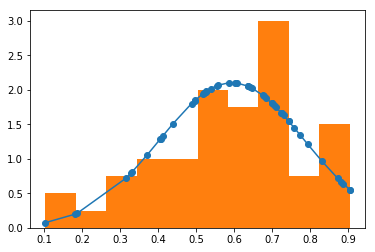

In [187]:
import numpy as np
import scipy.stats as stats
import pylab as pl

data = sorted(todays_hits["Energy"])

fit = stats.norm.pdf(data, np.mean(data), np.std(data))

pl.plot(data, fit, '-o')

pl.hist(data, density=True)

pl.show()

Are Spotify's measures of 'energy' and 'danceability' positively correlated?

Hypothesis:

If the mean 'energy' of a playlist's songs is higher than 0.5, then the playlist's mean 'danceability' will increase.

Null:

If the mean 'energy' of a playlist's songs is not higher than 0.5, then the playlist's mean 'danceability' will not increase.


The attributes we want to test:

Speechiness, instrumentalness, positively correlated
Liveness, loudness, positively correlated 
Tempo, loudness, positively correlated
Acoustiness, energy, negative correlation
Speechiness, tempo, negative correlation


In [338]:
# Code for running statistical tests
# Create empty lists to store the means for the chosen audio features
speechiness_avgs = []
instrumentalness_avgs = []
danceability_avgs = []
tempo_avgs = []
acousticness_avgs = []
liveness_avgs = []
loudness_avgs = []
energy_avgs = []
mode_avgs = []
duration_avgs = []
valence_avgs = []


# Loop through dictionary, pull playlists and store select audio features
for key in total_playlist_dict.keys():
    entry = total_playlist_dict[key]
    speechiness_avgs.append(np.mean(entry["Speechiness"]))
    instrumentalness_avgs.append(np.mean(entry["Instrumentalness"]))
    danceability_avgs.append(np.mean(entry["Danceability"]))
    tempo_avgs.append(np.mean(entry["Tempo"]))
    acousticness_avgs.append(np.mean(entry["Acousticness"]))
    liveness_avgs.append(np.mean(entry["Liveness"]))
    loudness_avgs.append(np.mean(entry["Loudness"]))
    energy_avgs.append(np.mean(entry["Energy"]))
    mode_avgs.append(np.mean(entry["Mode"]))
    duration_avgs.append(np.mean(entry["Duration(ms)"]))
    valence_avgs.append(np.mean(entry["Valence"]))    

In [397]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

# Tempo vs Loudness
my_dict = {
    "Tempo Avgs":tempo_avgs,
    "Loudness Avgs":loudness_avgs
}

df = pd.DataFrame(my_dict)
df.head()
len(df.index)

244

In [340]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values 

In [341]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [342]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [343]:
intercept = regressor.intercept_
print(regressor.intercept_)  

-26.175557707771496


In [344]:
coef = regressor.coef_
print(regressor.coef_) 

[0.15348135]


In [345]:
y_pred = regressor.predict(X_test) 

In [346]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
 

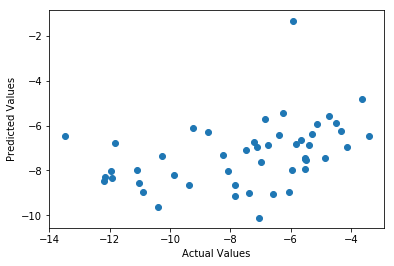

In [348]:
x1 = df["Actual"]
y1 = df["Predicted"]
plt.scatter(x1, y1)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.savefig("tempo_loudness_test.png")
plt.show()


In [349]:
print(regressor.score(X_test, y_test))

0.11710405501554277


In [350]:
stats.linregress(x1, y1)

LinregressResult(slope=0.22025297622059364, intercept=-5.623841345094689, rvalue=0.3932861639712888, pvalue=0.005180979606036537, stderr=0.07510628837863202)

In [351]:
stats.pearsonr(tempo_avgs, loudness_avgs)

(0.44465166483207086, 3.008706389211429e-13)

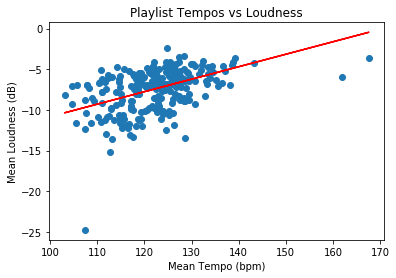

In [352]:
line = coef*X + intercept
plt.plot(X, y, "o", X, line, "r-")
plt.xlabel("Mean Tempo (bpm)")
plt.ylabel("Mean Loudness (dB)")
plt.title("Playlist Tempos vs Loudness")
plt.savefig("tempo_loudness_plot.png")
plt.show()

In [353]:
# Mode vs Valence

my_dict = {
    "Mode Avgs":mode_avgs,
    "Valence Avgs":valence_avgs
}

df = pd.DataFrame(my_dict)
df.head()
len(df.index)

244

In [354]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values 

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [355]:
intercept = regressor.intercept_
print(regressor.intercept_)  

0.34428786163278735


In [356]:
coef = regressor.coef_
print(regressor.coef_) 

[0.22842651]


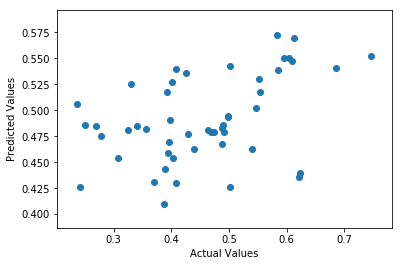

In [357]:
y_pred = regressor.predict(X_test) 

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  

x1 = df["Actual"]
y1 = df["Predicted"]
plt.scatter(x1, y1)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.savefig("mode_valence_test.png")
plt.show()

In [290]:
print(regressor.score(X_test, y_test))

0.09841145378993577


In [291]:
stats.linregress(x1, y1)

LinregressResult(slope=0.15105393541460252, intercept=0.4222661529822239, rvalue=0.43670336138325605, pvalue=0.0017059718884043103, stderr=0.04538880141643991)

In [312]:
stats.pearsonr(mode_avgs, valence_avgs)

(0.30047854404435975, 1.7490137431591394e-06)

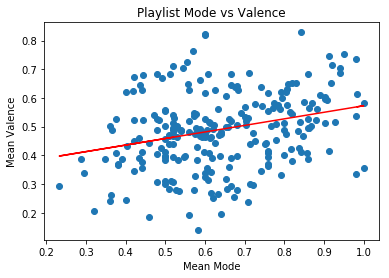

In [358]:
line = coef*X + intercept
plt.plot(X, y, "o", X, line, "r-")
plt.xlabel("Mean Mode")
plt.ylabel("Mean Valence")
plt.title("Playlist Mode vs Valence")
plt.savefig("mode_valence_plot.png")
plt.show()

In [359]:
# Tempo vs Duration

my_dict = {
    "Tempo Avgs":tempo_avgs,
    "Duration Avgs":duration_avgs
}

df = pd.DataFrame(my_dict)
df.head()
len(df.index)

244

In [360]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values 

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [361]:
intercept = regressor.intercept_
print(regressor.intercept_)

309070.02059353306


In [362]:
coef = regressor.coef_
print(regressor.coef_) 

[-608.961081]


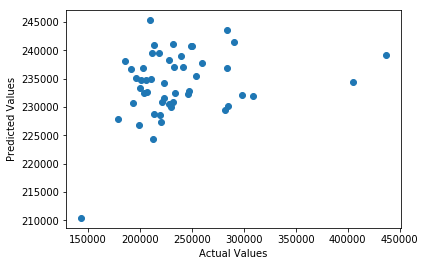

In [363]:
y_pred = regressor.predict(X_test) 

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  

x1 = df["Actual"]
y1 = df["Predicted"]
plt.scatter(x1, y1)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.savefig("tempo_duration_test.png")
plt.show()

In [364]:
print(regressor.score(X_test, y_test))

0.05200572389063595


In [365]:
stats.linregress(x1, y1)

LinregressResult(slope=0.033625464520774466, intercept=226168.59093572828, rvalue=0.2932686108845916, pvalue=0.04084565055027933, stderr=0.015989148658998784)

In [366]:
stats.pearsonr(tempo_avgs, duration_avgs)

(-0.16529188855537577, 0.009695642604939199)

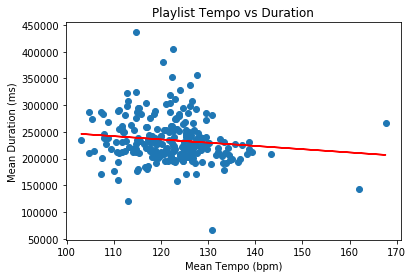

In [367]:
line = coef*X + intercept
plt.plot(X, y, "o", X, line, "r-")
plt.xlabel("Mean Tempo (bpm)")
plt.ylabel("Mean Duration (ms)")
plt.title("Playlist Tempo vs Duration")
plt.savefig("tempo_duration_plot.png")
plt.show()

In [368]:
# Energy vs Danceability

my_dict = {
    "Energy Avgs":energy_avgs,
    "Danceability Avgs":danceability_avgs
}

df = pd.DataFrame(my_dict)
df.head()
len(df.index)

244

In [369]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values 

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [370]:
intercept = regressor.intercept_
print(regressor.intercept_)

0.6059236949923177


In [371]:
coef = regressor.coef_
print(regressor.coef_) 

[-0.02564602]


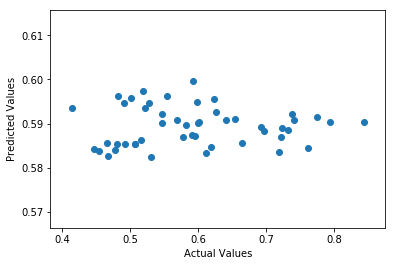

In [372]:
y_pred = regressor.predict(X_test) 

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  

x1 = df["Actual"]
y1 = df["Predicted"]
plt.scatter(x1, y1)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.savefig("energy_danceability_test.png")
plt.show()

In [373]:
print(regressor.score(X_test, y_test))

-0.0016601142665684243


In [374]:
stats.linregress(x1, y1)

LinregressResult(slope=0.0012914645835442927, intercept=0.5886316241451638, rvalue=0.030836221205378777, pvalue=0.8334092067392466, stderr=0.006106127125988529)

In [375]:
stats.pearsonr(energy_avgs, danceability_avgs)

(-0.03731902464076776, 0.561813132636831)

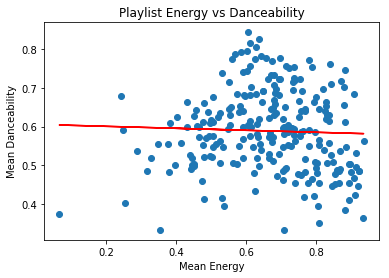

In [376]:
line = coef*X + intercept
plt.plot(X, y, "o", X, line, "r-")
plt.xlabel("Mean Energy")
plt.ylabel("Mean Danceability")
plt.title("Playlist Energy vs Danceability")
plt.savefig("energy_danceability_plot.png")
plt.show()

In [377]:
# Speechiness vs Intrumentalness

my_dict = {
    "Speechiness Avgs":speechiness_avgs,
    "Instrumentalness Avgs":instrumentalness_avgs
}

df = pd.DataFrame(my_dict)
df.head()
len(df.index)

244

In [378]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values 

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [379]:
intercept = regressor.intercept_
print(regressor.intercept_)

0.12766526788349178


In [380]:
coef = regressor.coef_
print(regressor.coef_) 

[-0.34583882]


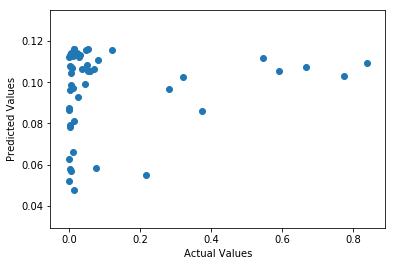

In [381]:
y_pred = regressor.predict(X_test) 

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  

x1 = df["Actual"]
y1 = df["Predicted"]
plt.scatter(x1, y1)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.savefig("speechiness_instrumentalness_test.png")
plt.show()

In [382]:
print(regressor.score(X_test, y_test))

0.013498828378399441


In [383]:
stats.linregress(x1, y1)

LinregressResult(slope=0.01459884953842019, intercept=0.09488387438776326, rvalue=0.1532986992390273, pvalue=0.2929737495747323, stderr=0.013726734963262216)

In [384]:
stats.pearsonr(speechiness_avgs, instrumentalness_avgs)

(-0.1264527879069382, 0.04849102564409151)

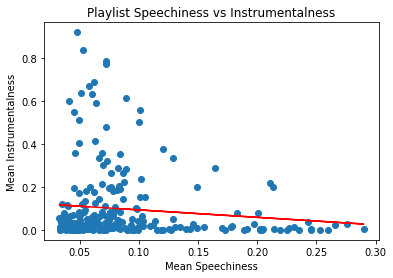

In [385]:
line = coef*X + intercept
plt.plot(X, y, "o", X, line, "r-")
plt.xlabel("Mean Speechiness")
plt.ylabel("Mean Instrumentalness")
plt.title("Playlist Speechiness vs Instrumentalness")
plt.savefig("speechiness_instrumentalness_plot.png")
plt.show()

In [386]:
# Acousticness vs Danceability

my_dict = {
    "Acousticness Avgs":acousticness_avgs,
    "Danceability Avgs":danceability_avgs
}

df = pd.DataFrame(my_dict)
df.head()
len(df.index)

244

In [387]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values 

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [388]:
intercept = regressor.intercept_
print(regressor.intercept_)

0.6018049497933233


In [389]:
coef = regressor.coef_
print(regressor.coef_) 

[-0.05879148]


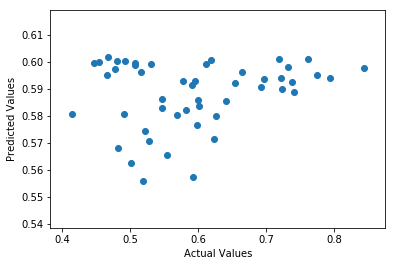

In [390]:
y_pred = regressor.predict(X_test) 

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  

x1 = df["Actual"]
y1 = df["Predicted"]
plt.scatter(x1, y1)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.savefig("acousticness_danceability_test.png")
plt.show()

In [391]:
print(regressor.score(X_test, y_test))

0.030220558850628243


In [392]:
stats.linregress(x1, y1)

LinregressResult(slope=0.02384457178179782, intercept=0.5739711187612656, rvalue=0.20418166883596015, pvalue=0.15935336005736278, stderr=0.016675421664079274)

In [393]:
stats.pearsonr(acousticness_avgs, danceability_avgs)

(-0.1272023574456582, 0.047163277736522624)

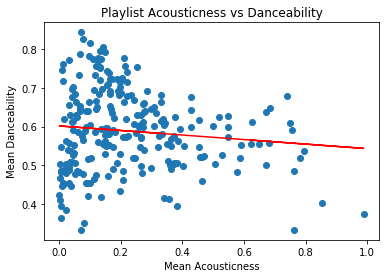

In [394]:
line = coef*X + intercept
plt.plot(X, y, "o", X, line, "r-")
plt.xlabel("Mean Acousticness")
plt.ylabel("Mean Danceability")
plt.title("Playlist Acousticness vs Danceability")
plt.savefig("acousticness_danceability_plot.png")
plt.show()